In [1]:
import matplotlib.pyplot as plt
import numpy as np
import keras.utils
import pickle
%matplotlib inline  

In [2]:
FREQ_DIST_FILE = r'C:\Users\rctuh\Desktop\sentimentAIET\dataset\/train-processed-freqdist.pkl'
BI_FREQ_DIST_FILE = r'C:\Users\rctuh\Desktop\sentimentAIET\dataset\train-processed-freqdist-bi.pkl'

In [3]:
with open(FREQ_DIST_FILE, 'rb') as pkl_file:
    freq_dist = pickle.load(pkl_file)
unigrams = freq_dist.most_common(20)
unigrams

[('i', 2869),
 ('to', 2677),
 ('the', 2676),
 ('a', 2094),
 ('and', 1985),
 ('you', 1667),
 ('depression', 1593),
 ('my', 1325),
 ('of', 1320),
 ('is', 1243),
 ('for', 1169),
 ('it', 1151),
 ('in', 1062),
 ('with', 792),
 ('that', 787),
 ('me', 760),
 ('on', 758),
 ('im', 737),
 ('have', 718),
 ('so', 665)]

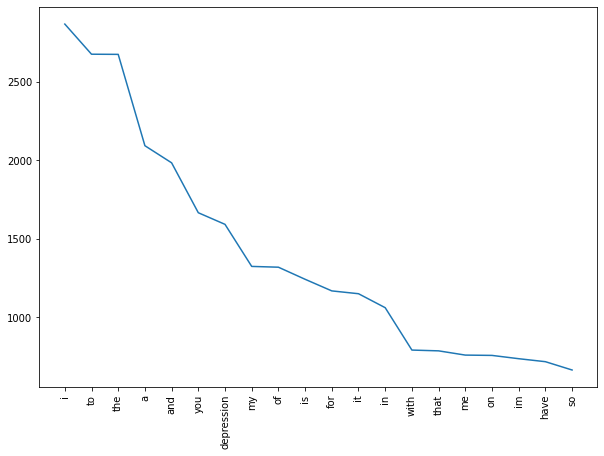

In [4]:
plt.figure(1, [10, 7])
x = np.array(range(0, 40, 2))
y = np.array([i[1] for i in unigrams])
my_xticks = [i[0] for i in unigrams]
plt.xticks(x, my_xticks, rotation=90)
plt.plot(x, y)
plt.show()

In [5]:
with open(BI_FREQ_DIST_FILE, 'rb') as pkl_file:
    freq_dist = pickle.load(pkl_file)
bigrams = freq_dist.most_common(20)
bigrams

[(('in', 'the'), 193),
 (('i', 'have'), 187),
 (('depression', 'and'), 178),
 (('for', 'the'), 172),
 (('i', 'love'), 166),
 (('of', 'the'), 161),
 (('going', 'to'), 157),
 (('to', 'the'), 156),
 (('have', 'a'), 140),
 (('i', 'am'), 134),
 (('on', 'the'), 131),
 (('my', 'depression'), 131),
 (('to', 'be'), 122),
 (('depression', 'is'), 117),
 (('and', 'i'), 112),
 (('i', 'was'), 110),
 (('to', 'see'), 103),
 (('thank', 'you'), 103),
 (('you', 'are'), 101),
 (('i', 'dont'), 101)]

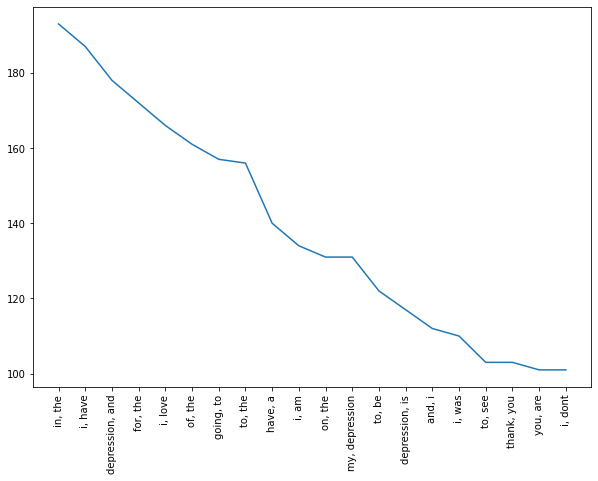

In [6]:
plt.figure(1, [10, 7])
x = np.array(range(0, 40, 2))
y = np.array([i[1] for i in bigrams])
my_xticks = [', '.join(i[0]) for i in bigrams]
plt.xticks(x, my_xticks, rotation=90)
plt.plot(x, y)
plt.show()

In [7]:
with open(FREQ_DIST_FILE, 'rb') as pkl_file:
    freq_dist = pickle.load(pkl_file)
unigrams = freq_dist.most_common(100)
log_ranks = np.log(range(1, 101))
log_freqs = np.log([i[1] for i in unigrams])
z = np.polyfit(log_ranks, log_freqs, 1)
p = np.poly1d(z)
p

poly1d([-0.80105859,  8.77154978])

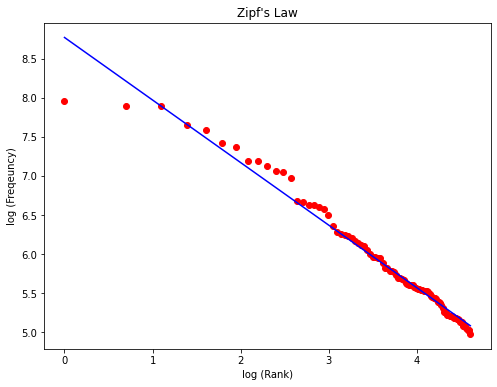

In [8]:
plt.figure(3, [8,6])
plt.plot(log_ranks, log_freqs, 'ro')
plt.plot(log_ranks,p(log_ranks),'b-')
plt.xlabel('log (Rank)')
plt.ylabel('log (Freqeuncy)')
plt.title('Zipf\'s Law')
plt.show()

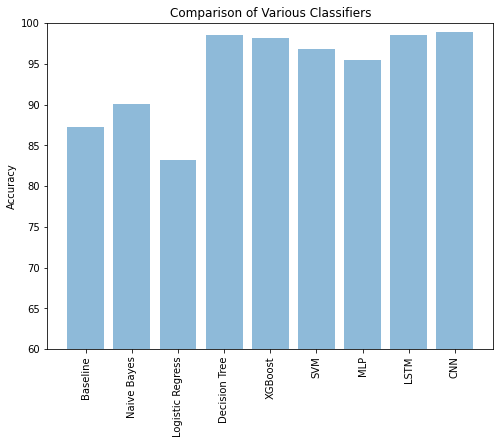

In [3]:
classifiers = ['Baseline', 'Naive Bayes', 'Logistic Regress', 'Decision Tree', 'XGBoost', 'SVM', 'MLP', 'LSTM', 'CNN']
accuracies = [87.26,90.027,83.2,98.4765,98.1690,96.8144,95.43,98.48,98.88]
plt.figure(4, [8,6])
plt.bar(range(len(classifiers)), accuracies, align='center', alpha=0.5)
plt.xticks(range(len(classifiers)), classifiers, rotation=90)
plt.ylabel('Accuracy')
plt.title('Comparison of Various Classifiers')
plt.ylim([60, 100])
plt.show()